# Exploring Library Usage in San Francisco

## Project Start Date: 3/8/2018

## Analyst: Ted Petrou

## Summary
In this notebook, we will follow the outline from the **First Look at Data** section onwards. We will systematically explore the basic facets of the data. This is just a starting point for our analysis and will be used as a launching point for future investigation.

## Load libraries
The vast majority (or sometimes all) the analysis for this routine can be completed with just pandas. NumPy can help with a few rare cases where no available pandas method exists or where increase in performance is necessary.

Pandas can also make a few, but very common, visualizations. Seaborn is imported to make a few different and more aethstetically pleasing visualizations.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
library = pd.read_csv('data/library_usage.csv')

## First glance at data
Use the `head` or `tail` commands to display the first/last rows of data. JupyterLab now has the ability to display csv files, so you can permanently keep the dataset open to browse at your liking while simultaneously working in the notebook.

In [3]:
library.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True,NaN
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False,NaN
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,z,email,True,2003,True,NaN
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016,z,email,True,2003,False,NaN
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016,z,email,True,2003,False,NaN


## Studying the data dictionary
Its important to take a close look at the data dictionary to get a solid understanding of each column.

## What if there is no data dictionary?
It is your job to find one or create one. I suggest asking database admins or searching online before attempting to create one yourself.

## Do you upkeep the data dictionary by hand or in pandas?
Pandas is not specifically designed for keeping notes in cells but it can be done somewhat pain-free. Pandas does however, allow you to add metadata very easily to columns. I will use pandas to keep all the notes and metadata. Using a spreadsheet is also acceptable and allows you to make edits a bit faster.

## Loading the data dictionary as a DataFrame
I converted the original data dictionary as an Excel file to a csv so that I could easily load it into pandas.

In [4]:
library_dd = pd.read_csv('data/Data Dictionary.csv')
library_dd

,Field Name,Data Type,Definition,Notes (optional)
0,Patron Type Code,Numeric,"Type of patron record (adult, teen, child, sen...",NaN
1,Patron Type Definition,Text,"Description of patron (adult, teen, child, sen...",NaN
2,Total Checkouts,Numeric,Total number of items the patron has checked o...,NaN
3,Total Renewals,Numeric,Total number of times the patron has renewed c...,NaN
4,Birth Date,Text,"Age ranges: 0 to 9 years, 10 to 19 years, 20 t...",NaN
5,Home Library Code,Text,Default value indicates the branch library whe...,NaN
6,Home Library Definition,Text,Description of the branch library where the pa...,NaN
7,Circulation Active Year,Text,Year the patron last checked out library mater...,NaN
8,Notice Preference Code,Text,This field is used to indicate the patron’s pr...,NaN
9,Notice Preference Definition,Text,Description of the patron’s preferred method o...,NaN


In [5]:
pd.options.display.max_colwidth

50

In [6]:
pd.options.display.max_colwidth = 200

In [7]:
library_dd

,Field Name,Data Type,Definition,Notes (optional)
0,Patron Type Code,Numeric,"Type of patron record (adult, teen, child, senior, etc.) Some blank.",NaN
1,Patron Type Definition,Text,"Description of patron (adult, teen, child, senior, etc.)",NaN
2,Total Checkouts,Numeric,Total number of items the patron has checked out from the library since the record was created.,NaN
3,Total Renewals,Numeric,Total number of times the patron has renewed checked-out items.,NaN
4,Birth Date,Text,"Age ranges: 0 to 9 years, 10 to 19 years, 20 to 24 years, 25 to 34 years, 35 to 44 years, 45 to 54 years, 55 to 59 years, 60 to 64 years 65 to 74 years, 75 years and over. Some blank.",NaN
5,Home Library Code,Text,Default value indicates the branch library where the patron was originally registered. Patrons can change this value if they change their preferred branch.,NaN
6,Home Library Definition,Text,Description of the branch library where the patron was originally registered.,NaN
7,Circulation Active Year,Text,"Year the patron last checked out library materials, or last logged into the library’s subscription databases from a computer outside the library.",NaN
8,Notice Preference Code,Text,"This field is used to indicate the patron’s preferred method of receiving library notices (email, print, phone). Some blank.",NaN
9,Notice Preference Definition,Text,Description of the patron’s preferred method of receiving library notices.,NaN


## Pandas data types
The data types in the official data dictionary are generic and not specific to pandas. Instead of using this default data dictinoary, we can create our own. Let's first copy it into a new variable.

In [8]:
library_dd_pandas = library_dd.copy()

## Replace the generic data types with pandas data types

In [9]:
library.dtypes

Patron Type Code                  int64
Patron Type Definition           object
Total Checkouts                   int64
Total Renewals                    int64
Age Range                        object
Home Library Code                object
Home Library Definition          object
Circulation Active Month         object
Circulation Active Year          object
Notice Preference Code           object
Notice Preference Definition     object
Provided Email Address             bool
Year Patron Registered            int64
Outside of County                  bool
Supervisor District             float64
dtype: object

In [10]:
library_dd_pandas['Data Type'] = library.dtypes

In [11]:
library_dd_pandas

,Field Name,Data Type,Definition,Notes (optional)
0,Patron Type Code,NaN,"Type of patron record (adult, teen, child, senior, etc.) Some blank.",NaN
1,Patron Type Definition,NaN,"Description of patron (adult, teen, child, senior, etc.)",NaN
2,Total Checkouts,NaN,Total number of items the patron has checked out from the library since the record was created.,NaN
3,Total Renewals,NaN,Total number of times the patron has renewed checked-out items.,NaN
4,Birth Date,NaN,"Age ranges: 0 to 9 years, 10 to 19 years, 20 to 24 years, 25 to 34 years, 35 to 44 years, 45 to 54 years, 55 to 59 years, 60 to 64 years 65 to 74 years, 75 years and over. Some blank.",NaN
5,Home Library Code,NaN,Default value indicates the branch library where the patron was originally registered. Patrons can change this value if they change their preferred branch.,NaN
6,Home Library Definition,NaN,Description of the branch library where the patron was originally registered.,NaN
7,Circulation Active Year,NaN,"Year the patron last checked out library materials, or last logged into the library’s subscription databases from a computer outside the library.",NaN
8,Notice Preference Code,NaN,"This field is used to indicate the patron’s preferred method of receiving library notices (email, print, phone). Some blank.",NaN
9,Notice Preference Definition,NaN,Description of the patron’s preferred method of receiving library notices.,NaN


## What went wrong?
Pandas aligns first on the index (the labels on the left in **bold**) of each object. `library.dtypes` has the **column names** as the index. The data dictionary just has **integers**. No alignment happens and missing values are the result.

## Move column name into the index
We can move the column names into the index from **`library_dd_pandas`** so that all future column data is automatically aligned properly.

In [12]:
library_dd_pandas = library_dd_pandas.rename(columns={'Field Name': 'Column Name'}) \
                                     .set_index('Column Name')
library_dd_pandas

,Data Type,Definition,Notes (optional)
Column Name,,,
Patron Type Code,NaN,"Type of patron record (adult, teen, child, senior, etc.) Some blank.",NaN
Patron Type Definition,NaN,"Description of patron (adult, teen, child, senior, etc.)",NaN
Total Checkouts,NaN,Total number of items the patron has checked out from the library since the record was created.,NaN
Total Renewals,NaN,Total number of times the patron has renewed checked-out items.,NaN
Birth Date,NaN,"Age ranges: 0 to 9 years, 10 to 19 years, 20 to 24 years, 25 to 34 years, 35 to 44 years, 45 to 54 years, 55 to 59 years, 60 to 64 years 65 to 74 years, 75 years and over. Some blank.",NaN
Home Library Code,NaN,Default value indicates the branch library where the patron was originally registered. Patrons can change this value if they change their preferred branch.,NaN
Home Library Definition,NaN,Description of the branch library where the patron was originally registered.,NaN
Circulation Active Year,NaN,"Year the patron last checked out library materials, or last logged into the library’s subscription databases from a computer outside the library.",NaN
Notice Preference Code,NaN,"This field is used to indicate the patron’s preferred method of receiving library notices (email, print, phone). Some blank.",NaN


## Redo previous operation
Now that the indexes are identical, the alignment will 

In [13]:
library_dd_pandas['Data Type'] = library.dtypes

In [14]:
library_dd_pandas

,Data Type,Definition,Notes (optional)
Column Name,,,
Patron Type Code,int64,"Type of patron record (adult, teen, child, senior, etc.) Some blank.",NaN
Patron Type Definition,object,"Description of patron (adult, teen, child, senior, etc.)",NaN
Total Checkouts,int64,Total number of items the patron has checked out from the library since the record was created.,NaN
Total Renewals,int64,Total number of times the patron has renewed checked-out items.,NaN
Birth Date,NaN,"Age ranges: 0 to 9 years, 10 to 19 years, 20 to 24 years, 25 to 34 years, 35 to 44 years, 45 to 54 years, 55 to 59 years, 60 to 64 years 65 to 74 years, 75 years and over. Some blank.",NaN
Home Library Code,object,Default value indicates the branch library where the patron was originally registered. Patrons can change this value if they change their preferred branch.,NaN
Home Library Definition,object,Description of the branch library where the patron was originally registered.,NaN
Circulation Active Year,object,"Year the patron last checked out library materials, or last logged into the library’s subscription databases from a computer outside the library.",NaN
Notice Preference Code,object,"This field is used to indicate the patron’s preferred method of receiving library notices (email, print, phone). Some blank.",NaN


## There's still something wrong - Birth Date column has a missing data type!
Each column's data type should never be missing, yet we are getting a missing value for the **`Birth Date`** column. This column is named **`Age Range`** in the actual dataset.

## Ensure all columns are the same in both DataFrames
Let's do a sanity check and see if there are same number of columns in the data as there are descriptions in the data dictionary.

In [15]:
len(library.columns)

15

In [16]:
len(library_dd_pandas.index)

14

## Failed sanity test
We don't even have the same number of values in each one.

## Find which values are in one but not the other
Use the `isin` method to find which values are in the data dictionary but are not columns in the data and vice-versa:

In [17]:
isin_dd = library_dd_pandas.index.isin(library.columns)
library_dd_pandas.index[~isin_dd]

Index(['Birth Date'], dtype='object', name='Column Name')

In [18]:
isin_data = library.columns.isin(library_dd_pandas.index)
library.columns[~isin_data]

Index(['Age Range', 'Circulation Active Month'], dtype='object')

## Conclusions of column name mistakes
* **`Birth Date`** from the data dictionary is named **`Age Range`** in the data.
* **`Circulation Active Month`** is in the data but absent from the data dictionary.

Let's rename **`Birth Date`** in data dictionary

In [19]:
library_dd_pandas = library_dd_pandas.rename(index={'Birth Date': 'Age Range'})
library_dd_pandas

,Data Type,Definition,Notes (optional)
Column Name,,,
Patron Type Code,int64,"Type of patron record (adult, teen, child, senior, etc.) Some blank.",NaN
Patron Type Definition,object,"Description of patron (adult, teen, child, senior, etc.)",NaN
Total Checkouts,int64,Total number of items the patron has checked out from the library since the record was created.,NaN
Total Renewals,int64,Total number of times the patron has renewed checked-out items.,NaN
Age Range,NaN,"Age ranges: 0 to 9 years, 10 to 19 years, 20 to 24 years, 25 to 34 years, 35 to 44 years, 45 to 54 years, 55 to 59 years, 60 to 64 years 65 to 74 years, 75 years and over. Some blank.",NaN
Home Library Code,object,Default value indicates the branch library where the patron was originally registered. Patrons can change this value if they change their preferred branch.,NaN
Home Library Definition,object,Description of the branch library where the patron was originally registered.,NaN
Circulation Active Year,object,"Year the patron last checked out library materials, or last logged into the library’s subscription databases from a computer outside the library.",NaN
Notice Preference Code,object,"This field is used to indicate the patron’s preferred method of receiving library notices (email, print, phone). Some blank.",NaN


## Insert new row for Circulation Active Month
This is tricky and not easily accomplished with pandas. 
* First, select the **`Circulation Active Year`** row as a **`Series`**
* Change the the definition and change the **`name`** which will be used as the new index label.

In [20]:
circulation_am = library_dd_pandas.loc['Circulation Active Year']
circulation_am['Definition'] = 'Month the patron last checked out library materials, ' \
                               'or last logged into the library’s subscription databases ' \
                               'from a computer outside the library.'
circulation_am.name = 'Circulation Active Month'

## Cut old data dictionary to pieces and splice in new row

In [21]:
df1 = library_dd_pandas.loc[:'Home Library Definition']
df2 = library_dd_pandas.loc['Circulation Active Year':]
library_dd_new = df1.append(circulation_am).append(df2)
library_dd_new

,Data Type,Definition,Notes (optional)
Column Name,,,
Patron Type Code,int64,"Type of patron record (adult, teen, child, senior, etc.) Some blank.",NaN
Patron Type Definition,object,"Description of patron (adult, teen, child, senior, etc.)",NaN
Total Checkouts,int64,Total number of items the patron has checked out from the library since the record was created.,NaN
Total Renewals,int64,Total number of times the patron has renewed checked-out items.,NaN
Age Range,NaN,"Age ranges: 0 to 9 years, 10 to 19 years, 20 to 24 years, 25 to 34 years, 35 to 44 years, 45 to 54 years, 55 to 59 years, 60 to 64 years 65 to 74 years, 75 years and over. Some blank.",NaN
Home Library Code,object,Default value indicates the branch library where the patron was originally registered. Patrons can change this value if they change their preferred branch.,NaN
Home Library Definition,object,Description of the branch library where the patron was originally registered.,NaN
Circulation Active Month,object,"Month the patron last checked out library materials, or last logged into the library’s subscription databases from a computer outside the library.",NaN
Circulation Active Year,object,"Month the patron last checked out library materials, or last logged into the library’s subscription databases from a computer outside the library.",NaN


## Are we finally ready to align the data?
Let's find out one more time and add in the data types

In [22]:
library_dd_new['Data Type'] = library.dtypes
library_dd_new

,Data Type,Definition,Notes (optional)
Column Name,,,
Patron Type Code,int64,"Type of patron record (adult, teen, child, senior, etc.) Some blank.",NaN
Patron Type Definition,object,"Description of patron (adult, teen, child, senior, etc.)",NaN
Total Checkouts,int64,Total number of items the patron has checked out from the library since the record was created.,NaN
Total Renewals,int64,Total number of times the patron has renewed checked-out items.,NaN
Age Range,object,"Age ranges: 0 to 9 years, 10 to 19 years, 20 to 24 years, 25 to 34 years, 35 to 44 years, 45 to 54 years, 55 to 59 years, 60 to 64 years 65 to 74 years, 75 years and over. Some blank.",NaN
Home Library Code,object,Default value indicates the branch library where the patron was originally registered. Patrons can change this value if they change their preferred branch.,NaN
Home Library Definition,object,Description of the branch library where the patron was originally registered.,NaN
Circulation Active Month,object,"Month the patron last checked out library materials, or last logged into the library’s subscription databases from a computer outside the library.",NaN
Circulation Active Year,object,"Month the patron last checked out library materials, or last logged into the library’s subscription databases from a computer outside the library.",NaN


## Comparing the pandas data types to the original data types
All the data types seem to match. Pandas uses the **object** data type to hold text. But, if you look closely, the **`Circulation Active Year`** is text even though it appears to be an integer. We will come back to this later.

## Making notes and updating the data dictionary
Its quite straightforward to update the data dictionary. We just need to select the exact cell of data with the **`.loc`** indexer and give it a new value.

Let's make a note that the **`Circulation Active Month`** was not in the orginal data dictionary

In [23]:
# rename column Notes (optional) to Notes
library_dd_new = library_dd_new.rename(columns={'Notes (optional)': 'Notes'})

In [24]:
library_dd_new.loc['Circulation Active Month', 'Notes'] = 'This column was not in original data dictionary'
library_dd_new

,Data Type,Definition,Notes
Column Name,,,
Patron Type Code,int64,"Type of patron record (adult, teen, child, senior, etc.) Some blank.",NaN
Patron Type Definition,object,"Description of patron (adult, teen, child, senior, etc.)",NaN
Total Checkouts,int64,Total number of items the patron has checked out from the library since the record was created.,NaN
Total Renewals,int64,Total number of times the patron has renewed checked-out items.,NaN
Age Range,object,"Age ranges: 0 to 9 years, 10 to 19 years, 20 to 24 years, 25 to 34 years, 35 to 44 years, 45 to 54 years, 55 to 59 years, 60 to 64 years 65 to 74 years, 75 years and over. Some blank.",NaN
Home Library Code,object,Default value indicates the branch library where the patron was originally registered. Patrons can change this value if they change their preferred branch.,NaN
Home Library Definition,object,Description of the branch library where the patron was originally registered.,NaN
Circulation Active Month,object,"Month the patron last checked out library materials, or last logged into the library’s subscription databases from a computer outside the library.",This column was not in original data dictionary
Circulation Active Year,object,"Month the patron last checked out library materials, or last logged into the library’s subscription databases from a computer outside the library.",NaN


## Continuing on with checklist
Find the number of rows and columns

In [25]:
library.shape

(423448, 15)

## Get a distribution of the data types

In [26]:
library.dtypes.value_counts()

object     8
int64      4
bool       2
float64    1
dtype: int64

## Find the number of missing values per column

In [27]:
library.isna().sum()

Patron Type Code                     0
Patron Type Definition               0
Total Checkouts                      0
Total Renewals                       0
Age Range                          215
Home Library Code                   40
Home Library Definition              0
Circulation Active Month             0
Circulation Active Year              0
Notice Preference Code               0
Notice Preference Definition         0
Provided Email Address               0
Year Patron Registered               0
Outside of County                    0
Supervisor District             110310
dtype: int64

## Append this as a column to the data dictionary
Index alignment helps us out here

In [28]:
library_dd_new['Missing Values Count'] = library.isna().sum()
library_dd_new

,Data Type,Definition,Notes,Missing Values Count
Column Name,,,,
Patron Type Code,int64,"Type of patron record (adult, teen, child, senior, etc.) Some blank.",NaN,0
Patron Type Definition,object,"Description of patron (adult, teen, child, senior, etc.)",NaN,0
Total Checkouts,int64,Total number of items the patron has checked out from the library since the record was created.,NaN,0
Total Renewals,int64,Total number of times the patron has renewed checked-out items.,NaN,0
Age Range,object,"Age ranges: 0 to 9 years, 10 to 19 years, 20 to 24 years, 25 to 34 years, 35 to 44 years, 45 to 54 years, 55 to 59 years, 60 to 64 years 65 to 74 years, 75 years and over. Some blank.",NaN,215
Home Library Code,object,Default value indicates the branch library where the patron was originally registered. Patrons can change this value if they change their preferred branch.,NaN,40
Home Library Definition,object,Description of the branch library where the patron was originally registered.,NaN,0
Circulation Active Month,object,"Month the patron last checked out library materials, or last logged into the library’s subscription databases from a computer outside the library.",This column was not in original data dictionary,0
Circulation Active Year,object,"Month the patron last checked out library materials, or last logged into the library’s subscription databases from a computer outside the library.",NaN,0


## Can also do % of missing values

In [29]:
library_dd_new['Missing Values %'] = library.isna().mean()
library_dd_new

,Data Type,Definition,Notes,Missing Values Count,Missing Values %
Column Name,,,,,
Patron Type Code,int64,"Type of patron record (adult, teen, child, senior, etc.) Some blank.",NaN,0,0.000000
Patron Type Definition,object,"Description of patron (adult, teen, child, senior, etc.)",NaN,0,0.000000
Total Checkouts,int64,Total number of items the patron has checked out from the library since the record was created.,NaN,0,0.000000
Total Renewals,int64,Total number of times the patron has renewed checked-out items.,NaN,0,0.000000
Age Range,object,"Age ranges: 0 to 9 years, 10 to 19 years, 20 to 24 years, 25 to 34 years, 35 to 44 years, 45 to 54 years, 55 to 59 years, 60 to 64 years 65 to 74 years, 75 years and over. Some blank.",NaN,215,0.000508
Home Library Code,object,Default value indicates the branch library where the patron was originally registered. Patrons can change this value if they change their preferred branch.,NaN,40,0.000094
Home Library Definition,object,Description of the branch library where the patron was originally registered.,NaN,0,0.000000
Circulation Active Month,object,"Month the patron last checked out library materials, or last logged into the library’s subscription databases from a computer outside the library.",This column was not in original data dictionary,0,0.000000
Circulation Active Year,object,"Month the patron last checked out library materials, or last logged into the library’s subscription databases from a computer outside the library.",NaN,0,0.000000


## Is the data tidy?
This is an important question to ask towards the very beginning of a data analysis. Hadley Wickham is famous for instilling this core tennet.

Tidy data is when:
* Each variable forms a column
* Each observation forms a row
* Each observational unit forms a table

## Check to see if our data is tidy
Most data from relational databases will meet this criteria. This data is likely stored in a relational database and from the description we know that each row reprsents a single patron (an observation).

Some columns appear to have duplicate information and we may not need them. Although, this isn't strictly mentioned in the three tidy principles, duplicate information won't add anything to our analysis.

## Check for duplication of Patron Type Code amd Patron Type Description
We can do a **two-way contingency table** to count the co-occurrences of each pair to determine if there is indeed a one-to-one mapping

In [30]:
patron_table = pd.crosstab(library['Patron Type Code'], library['Patron Type Definition'])
patron_table

Patron Type Definition,ADULT,AT USER ADULT,AT USER JUVENILE,AT USER SENIOR,AT USER TEEN,AT USER WELCOME,BOOKS BY MAIL,DIGITAL ACCESS CARD,FRIENDS FOR LIFE,JUVENILE,RETIRED STAFF,SENIOR,SPECIAL,STAFF,TEACHER CARD,VISITOR,WELCOME,YOUNG ADULT
Patron Type Code,,,,,,,,,,,,,,,,,,
0,272251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,59208,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28816
3,0,0,0,0,0,0,0,0,0,0,0,41619,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14931,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,862,0,0,0,0
8,0,0,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,977,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,415,0,0


# Ensuring a one to one relationship
Let's see if the sum equals the maximum for all columns. If it does, then we can drop one of the columns.

In [31]:
patron_table.sum() == patron_table.max()

Patron Type Definition
ADULT                  True
AT USER ADULT          True
AT USER JUVENILE       True
AT USER SENIOR         True
AT USER TEEN           True
AT USER WELCOME        True
BOOKS BY MAIL          True
DIGITAL ACCESS CARD    True
FRIENDS FOR LIFE       True
JUVENILE               True
RETIRED STAFF          True
SENIOR                 True
SPECIAL                True
STAFF                  True
TEACHER CARD           True
VISITOR                True
WELCOME                True
YOUNG ADULT            True
dtype: bool

# Drop the Patron Type Code

In [32]:
library_new = library.drop(columns='Patron Type Code')
library_new.head()

,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True,NaN
1,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False,NaN
2,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,z,email,True,2003,True,NaN
3,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016,z,email,True,2003,False,NaN
4,ADULT,182,90,45 to 54 years,X,Main Library,July,2016,z,email,True,2003,False,NaN


## Repeat for Notice Preference Code and Notice Preference Definition

In [33]:
pd.crosstab(library['Notice Preference Code'], library['Notice Preference Definition'])

Notice Preference Definition,email,none,phone,print
Notice Preference Code,,,,
-,0,3,0,0
a,0,0,0,31336
p,0,0,68172,0
z,323937,0,0,0


We can easily determine that there is indeed a one-to-one mapping. Let's again drop the code and keep the definition.

In [34]:
library_new = library_new.drop(columns='Notice Preference Code')
library_new.head()

,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,email,True,2003,True,NaN
1,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,email,True,2003,False,NaN
2,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,email,True,2003,True,NaN
3,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016,email,True,2003,False,NaN
4,ADULT,182,90,45 to 54 years,X,Main Library,July,2016,email,True,2003,False,NaN


### Consolidating the dates
**`Circulation Active Month`** and **`Circulation Active Year`** may be consolidated to a single field. We can always strip out the componenets later if we need them.

Before we do this, let's take a look at the unique values/counts of each of these columns.

In [35]:
library['Circulation Active Month'].value_counts()

July         91566
None         67904
June         40316
May          31381
April        25172
March        23968
August       22081
December     20787
January      20623
September    20568
February     19936
October      19716
November     19430
Name: Circulation Active Month, dtype: int64

In [36]:
library['Circulation Active Year'].value_counts()

2016    147901
2015     79623
None     67904
2014     63502
2013     43722
2012      9571
2011      3108
2010      2975
2009      1820
2008      1244
2007       710
2006       567
2005       498
2004       297
2003         6
Name: Circulation Active Year, dtype: int64

## Missing values?
It appears there are missing values **'None'**, but our **`isna`** method didn't catch them. Let's look at the unique values to get a closer look.

In [37]:
library['Circulation Active Month'].unique()

array(['November', 'October', 'January', 'February', 'July', 'December',
       'September', 'May', 'August', 'March', 'June', 'April', 'None'],
      dtype=object)

## Date Parsing
There are multiple ways to construct dates with pandas. The **`to_datetime`** function is very flexible with what it accepts as a date string. Here, we simply concatenate the month and year and place a comma between the values.

In [38]:
dates = library['Circulation Active Month'] + ', ' + library['Circulation Active Year']
dates.head()

0    November, 2012
1     October, 2015
2     January, 2015
3    February, 2016
4        July, 2016
dtype: object

In [39]:
pd.to_datetime(dates.head())

0   2012-11-01
1   2015-10-01
2   2015-01-01
3   2016-02-01
4   2016-07-01
dtype: datetime64[ns]

In [40]:
circulation_ad = pd.to_datetime(dates, errors='coerce')

## Use the **`insert`** method to put in new column in a specific place

In [41]:
loc = library_new.columns.get_loc('Circulation Active Month')
loc

6

This happens **inplace**

In [42]:
library_new.insert(loc, 'Circulation Active Date', circulation_ad)

In [46]:
library_new.head()

,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Date,Circulation Active Month,Circulation Active Year,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,SENIOR,28,13,65 to 74 years,X,Main Library,2012-11-01,November,2012,email,True,2003,True,NaN
1,ADULT,21,10,55 to 59 years,X,Main Library,2015-10-01,October,2015,email,True,2003,False,NaN
2,ADULT,275,559,60 to 64 years,X,Main Library,2015-01-01,January,2015,email,True,2003,True,NaN
3,ADULT,73,38,45 to 54 years,M8,Mission Bay,2016-02-01,February,2016,email,True,2003,False,NaN
4,ADULT,182,90,45 to 54 years,X,Main Library,2016-07-01,July,2016,email,True,2003,False,NaN


In [45]:
circulation_ad.isna().sum()

67904

## Drop the old Circulation columns

In [47]:
library_new = library_new.drop(columns=['Circulation Active Year', 'Circulation Active Month'])
library_new.head()

,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Date,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,SENIOR,28,13,65 to 74 years,X,Main Library,2012-11-01,email,True,2003,True,NaN
1,ADULT,21,10,55 to 59 years,X,Main Library,2015-10-01,email,True,2003,False,NaN
2,ADULT,275,559,60 to 64 years,X,Main Library,2015-01-01,email,True,2003,True,NaN
3,ADULT,73,38,45 to 54 years,M8,Mission Bay,2016-02-01,email,True,2003,False,NaN
4,ADULT,182,90,45 to 54 years,X,Main Library,2016-07-01,email,True,2003,False,NaN


## One more set of columns - Home Library

In [48]:
home_library_codes = pd.crosstab(library_new['Home Library Code'], library_new['Home Library Definition'])
home_library_codes.head(10)

Home Library Definition,Anza,Bayview/Linda Brooks-Burton,Bernal Heights,Branch Bookmobile (Excelsior),Branch Bookmobile (Marina),Branch Bookmobile (Sunset),Branch Bookmobile (West Portal),Children's Bookmobile,Chinatown,Eureka Valley/Harvey Milk Memorial,...,Parkside,Portola,Potrero,Presidio,Richmond,Sunset,Unknown,Visitacion Valley,West Portal,Western Addition
Home Library Code,,,,,,,,,,,,,,,,,,,,,
A5,7183,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AQUIS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
B2,0,8417,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B2AAA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,0,0,0
B2AZZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
B4,0,0,9630,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B4AAA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
C2,0,0,0,0,0,0,0,0,17140,0,...,0,0,0,0,0,0,0,0,0,0
C2J,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,32,0,0,0


In [49]:
home_library_codes.sum() == home_library_codes.max()

Home Library Definition
Anza                                   True
Bayview/Linda Brooks-Burton            True
Bernal Heights                         True
Branch Bookmobile (Excelsior)          True
Branch Bookmobile (Marina)             True
Branch Bookmobile (Sunset)             True
Branch Bookmobile (West Portal)        True
Children's Bookmobile                  True
Chinatown                              True
Eureka Valley/Harvey Milk Memorial     True
Excelsior                              True
Glen Park                              True
Golden Gate Valley                     True
Ingleside                              True
Library on Wheels                      True
Main Library                           True
Marina                                 True
Merced                                 True
Mission                                True
Mission Bay                            True
Noe Valley/Sally Brunn                 True
North Beach                            True
Ocean Vi

## Not quite a one-to-one mapping 
Some codes have an **unknown description** If we drop the code column, we would be losing some information. If most of the unknowns belong to a single code, we might be able to drop it.

In [50]:
home_library_codes['Unknown'].sum(), home_library_codes['Unknown'].max()

(1458, 754)

In [51]:
home_library_codes['Unknown'].ne(0).sum()

45

There are 45 library codes that have atleast one unknown value. So, there could be value in keeping this column but for now, we will drop it to simplify our lives and make a note of this.

In [52]:
library_new = library_new.drop(columns='Home Library Code')
library_new.head()

,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Definition,Circulation Active Date,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,SENIOR,28,13,65 to 74 years,Main Library,2012-11-01,email,True,2003,True,NaN
1,ADULT,21,10,55 to 59 years,Main Library,2015-10-01,email,True,2003,False,NaN
2,ADULT,275,559,60 to 64 years,Main Library,2015-01-01,email,True,2003,True,NaN
3,ADULT,73,38,45 to 54 years,Mission Bay,2016-02-01,email,True,2003,False,NaN
4,ADULT,182,90,45 to 54 years,Main Library,2016-07-01,email,True,2003,False,NaN


## Clean-up data dictionary
We have dropped several columns from our data. Let's drop them from the index of our data dictionary.

In [53]:
library_dd_new= library_dd_new.drop(index=['Patron Type Code', 'Home Library Code', 
                                           'Circulation Active Month', 'Circulation Active Year', 
                                           'Notice Preference Code'])
library_dd_new

,Data Type,Definition,Notes,Missing Values Count,Missing Values %
Column Name,,,,,
Patron Type Definition,object,"Description of patron (adult, teen, child, senior, etc.)",NaN,0,0.000000
Total Checkouts,int64,Total number of items the patron has checked out from the library since the record was created.,NaN,0,0.000000
Total Renewals,int64,Total number of times the patron has renewed checked-out items.,NaN,0,0.000000
Age Range,object,"Age ranges: 0 to 9 years, 10 to 19 years, 20 to 24 years, 25 to 34 years, 35 to 44 years, 45 to 54 years, 55 to 59 years, 60 to 64 years 65 to 74 years, 75 years and over. Some blank.",NaN,215,0.000508
Home Library Definition,object,Description of the branch library where the patron was originally registered.,NaN,0,0.000000
Notice Preference Definition,object,Description of the patron’s preferred method of receiving library notices.,NaN,0,0.000000
Provided Email Address,bool,Indicates whether the patron provided an email address,NaN,0,0.000000
Year Patron Registered,int64,Year patron registered with library system. No dates prior to 2003 due to system migration.,NaN,0,0.000000
Outside of County,bool,"If a patron's home address is not in San Francisco, then flagged as true, otherwise false.",NaN,0,0.000000


# We also added a column to our data dictonary
Let's append it to the bottom (and correct its placement later)

In [54]:
dtype = library_new.dtypes['Circulation Active Date']
description = "Date the patron last checked out library materials, or last logged into the library's " \
              "subscription databases from a computer outside the library. "
count_na = library_new['Circulation Active Date'].isna().sum()
pct_na = library_new['Circulation Active Date'].isna().mean()
note = 'This column replaced both Circulation Active Month/Year'

In [55]:
library_dd_new.loc['Circulation Active Date'] = [dtype, description, note, count_na, pct_na]

In [56]:
library_dd_new

,Data Type,Definition,Notes,Missing Values Count,Missing Values %
Column Name,,,,,
Patron Type Definition,object,"Description of patron (adult, teen, child, senior, etc.)",NaN,0,0.000000
Total Checkouts,int64,Total number of items the patron has checked out from the library since the record was created.,NaN,0,0.000000
Total Renewals,int64,Total number of times the patron has renewed checked-out items.,NaN,0,0.000000
Age Range,object,"Age ranges: 0 to 9 years, 10 to 19 years, 20 to 24 years, 25 to 34 years, 35 to 44 years, 45 to 54 years, 55 to 59 years, 60 to 64 years 65 to 74 years, 75 years and over. Some blank.",NaN,215,0.000508
Home Library Definition,object,Description of the branch library where the patron was originally registered.,NaN,0,0.000000
Notice Preference Definition,object,Description of the patron’s preferred method of receiving library notices.,NaN,0,0.000000
Provided Email Address,bool,Indicates whether the patron provided an email address,NaN,0,0.000000
Year Patron Registered,int64,Year patron registered with library system. No dates prior to 2003 due to system migration.,NaN,0,0.000000
Outside of County,bool,"If a patron's home address is not in San Francisco, then flagged as true, otherwise false.",NaN,0,0.000000


## Add notes for **Code** columns that were dropped

In [57]:
library_dd_new.loc['Patron Type Definition', 'Note'] = 'Patron Code had 1-1 mapping and was subsequently dropped'
library_dd_new.loc['Home Library Definition', 'Note'] = 'Home library code had nearly 1-1 mapping except for Unknown, but was stil dropped'
library_dd_new.loc['Notice Preference Definition', 'Note'] = 'Patron Code had 1-1 mapping and was subsequently dropped'

In [58]:
library_dd_new

,Data Type,Definition,Notes,Missing Values Count,Missing Values %,Note
Column Name,,,,,,
Patron Type Definition,object,"Description of patron (adult, teen, child, senior, etc.)",NaN,0,0.000000,Patron Code had 1-1 mapping and was subsequently dropped
Total Checkouts,int64,Total number of items the patron has checked out from the library since the record was created.,NaN,0,0.000000,NaN
Total Renewals,int64,Total number of times the patron has renewed checked-out items.,NaN,0,0.000000,NaN
Age Range,object,"Age ranges: 0 to 9 years, 10 to 19 years, 20 to 24 years, 25 to 34 years, 35 to 44 years, 45 to 54 years, 55 to 59 years, 60 to 64 years 65 to 74 years, 75 years and over. Some blank.",NaN,215,0.000508,NaN
Home Library Definition,object,Description of the branch library where the patron was originally registered.,NaN,0,0.000000,"Home library code had nearly 1-1 mapping except for Unknown, but was stil dropped"
Notice Preference Definition,object,Description of the patron’s preferred method of receiving library notices.,NaN,0,0.000000,Patron Code had 1-1 mapping and was subsequently dropped
Provided Email Address,bool,Indicates whether the patron provided an email address,NaN,0,0.000000,NaN
Year Patron Registered,int64,Year patron registered with library system. No dates prior to 2003 due to system migration.,NaN,0,0.000000,NaN
Outside of County,bool,"If a patron's home address is not in San Francisco, then flagged as true, otherwise false.",NaN,0,0.000000,NaN


## Rearrange Columns
Initial column order is not something set in stone. You can change the order to better suit your needs. Typically, categorical variables are placed before continuous variables, but you can create an arrangement that helps you analyze the data better.

In [59]:
library_new.head()

,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Definition,Circulation Active Date,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,SENIOR,28,13,65 to 74 years,Main Library,2012-11-01,email,True,2003,True,NaN
1,ADULT,21,10,55 to 59 years,Main Library,2015-10-01,email,True,2003,False,NaN
2,ADULT,275,559,60 to 64 years,Main Library,2015-01-01,email,True,2003,True,NaN
3,ADULT,73,38,45 to 54 years,Mission Bay,2016-02-01,email,True,2003,False,NaN
4,ADULT,182,90,45 to 54 years,Main Library,2016-07-01,email,True,2003,False,NaN


It helps to print out the columns:

In [60]:
library_new.columns

Index(['Patron Type Definition', 'Total Checkouts', 'Total Renewals',
       'Age Range', 'Home Library Definition', 'Circulation Active Date',
       'Notice Preference Definition', 'Provided Email Address',
       'Year Patron Registered', 'Outside of County', 'Supervisor District'],
      dtype='object')

In [61]:
new_col_order = ['Patron Type Definition', 'Age Range', 'Home Library Definition', 
                 'Circulation Active Date', 'Total Checkouts', 'Total Renewals',
                 'Notice Preference Definition', 'Provided Email Address',
                 'Year Patron Registered', 'Outside of County', 'Supervisor District']
len(new_col_order) == len(library_new.columns)

True

In [62]:
set(new_col_order) == set(library_new.columns)

True

In [63]:
library_new = library_new[new_col_order]
library_new.head()

,Patron Type Definition,Age Range,Home Library Definition,Circulation Active Date,Total Checkouts,Total Renewals,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,SENIOR,65 to 74 years,Main Library,2012-11-01,28,13,email,True,2003,True,NaN
1,ADULT,55 to 59 years,Main Library,2015-10-01,21,10,email,True,2003,False,NaN
2,ADULT,60 to 64 years,Main Library,2015-01-01,275,559,email,True,2003,True,NaN
3,ADULT,45 to 54 years,Mission Bay,2016-02-01,73,38,email,True,2003,False,NaN
4,ADULT,45 to 54 years,Main Library,2016-07-01,182,90,email,True,2003,False,NaN


## Use these columns to rearrange the data dictionary as well

In [64]:
library_dd_new.loc[new_col_order]

,Data Type,Definition,Notes,Missing Values Count,Missing Values %,Note
Column Name,,,,,,
Patron Type Definition,object,"Description of patron (adult, teen, child, senior, etc.)",NaN,0,0.000000,Patron Code had 1-1 mapping and was subsequently dropped
Age Range,object,"Age ranges: 0 to 9 years, 10 to 19 years, 20 to 24 years, 25 to 34 years, 35 to 44 years, 45 to 54 years, 55 to 59 years, 60 to 64 years 65 to 74 years, 75 years and over. Some blank.",NaN,215,0.000508,NaN
Home Library Definition,object,Description of the branch library where the patron was originally registered.,NaN,0,0.000000,"Home library code had nearly 1-1 mapping except for Unknown, but was stil dropped"
Circulation Active Date,datetime64[ns],"Date the patron last checked out library materials, or last logged into the library's subscription databases from a computer outside the library.",This column replaced both Circulation Active Month/Year,67904,0.160360,NaN
Total Checkouts,int64,Total number of items the patron has checked out from the library since the record was created.,NaN,0,0.000000,NaN
Total Renewals,int64,Total number of times the patron has renewed checked-out items.,NaN,0,0.000000,NaN
Notice Preference Definition,object,Description of the patron’s preferred method of receiving library notices.,NaN,0,0.000000,Patron Code had 1-1 mapping and was subsequently dropped
Provided Email Address,bool,Indicates whether the patron provided an email address,NaN,0,0.000000,NaN
Year Patron Registered,int64,Year patron registered with library system. No dates prior to 2003 due to system migration.,NaN,0,0.000000,NaN


## Tidier data
Data should now be easier to do analysis. There are other datasets that take quite a lot more work.

# Univariate Descriptive Statistics
I generally recommend by starting with simple one-dimensional data analysis once you have tidy data. The chart in the checklist sheet can help you determine what graphical/non-graphical approaches you can take based on the type of data.

## Using the describe method
The describe method is good for getting the five-number summary (min, max, median, first/third quartiles) for continuous data. It also gives the number of unique values and most common value for the categorical values.

In [65]:
library_new.describe(include='O').T

,count,unique,top,freq
Patron Type Definition,423448,18,ADULT,272251
Age Range,423233,10,25 to 34 years,91083
Home Library Definition,423448,35,Main Library,124814
Notice Preference Definition,423448,4,email,323937


Let's add the number of unique values to our data dictionary

In [66]:
library_new.nunique()

Patron Type Definition            18
Age Range                         10
Home Library Definition           35
Circulation Active Date          152
Total Checkouts                 4274
Total Renewals                  2738
Notice Preference Definition       4
Provided Email Address             2
Year Patron Registered            14
Outside of County                  2
Supervisor District               11
dtype: int64

In [67]:
library_dd_new['count unique'] = library_new.nunique()
library_dd_new

,Data Type,Definition,Notes,Missing Values Count,Missing Values %,Note,count unique
Column Name,,,,,,,
Patron Type Definition,object,"Description of patron (adult, teen, child, senior, etc.)",NaN,0,0.000000,Patron Code had 1-1 mapping and was subsequently dropped,18
Total Checkouts,int64,Total number of items the patron has checked out from the library since the record was created.,NaN,0,0.000000,NaN,4274
Total Renewals,int64,Total number of times the patron has renewed checked-out items.,NaN,0,0.000000,NaN,2738
Age Range,object,"Age ranges: 0 to 9 years, 10 to 19 years, 20 to 24 years, 25 to 34 years, 35 to 44 years, 45 to 54 years, 55 to 59 years, 60 to 64 years 65 to 74 years, 75 years and over. Some blank.",NaN,215,0.000508,NaN,10
Home Library Definition,object,Description of the branch library where the patron was originally registered.,NaN,0,0.000000,"Home library code had nearly 1-1 mapping except for Unknown, but was stil dropped",35
Notice Preference Definition,object,Description of the patron’s preferred method of receiving library notices.,NaN,0,0.000000,Patron Code had 1-1 mapping and was subsequently dropped,4
Provided Email Address,bool,Indicates whether the patron provided an email address,NaN,0,0.000000,NaN,2
Year Patron Registered,int64,Year patron registered with library system. No dates prior to 2003 due to system migration.,NaN,0,0.000000,NaN,14
Outside of County,bool,"If a patron's home address is not in San Francisco, then flagged as true, otherwise false.",NaN,0,0.000000,NaN,2


## Being efficient with categorical data
Pandas has a specific data type for dealing with low-cardinality text columns

In [68]:
library_new.memory_usage(deep=True)

Index                                 80
Patron Type Definition          26722568
Age Range                       30022389
Home Library Definition         28744750
Circulation Active Date          3387584
Total Checkouts                  3387584
Total Renewals                   3387584
Notice Preference Definition    26253773
Provided Email Address            423448
Year Patron Registered           3387584
Outside of County                 423448
Supervisor District              3387584
dtype: int64

In [69]:
library_new = library_new.astype({'Patron Type Definition': 'category',
                                  'Age Range': 'category',
                                  'Home Library Definition': 'category',
                                 'Notice Preference Definition': 'category'})
library_new.dtypes

Patron Type Definition                category
Age Range                             category
Home Library Definition               category
Circulation Active Date         datetime64[ns]
Total Checkouts                          int64
Total Renewals                           int64
Notice Preference Definition          category
Provided Email Address                    bool
Year Patron Registered                   int64
Outside of County                         bool
Supervisor District                    float64
dtype: object

In [70]:
library_dd_new['Data Type'] = library_new.dtypes
library_dd_new

,Data Type,Definition,Notes,Missing Values Count,Missing Values %,Note,count unique
Column Name,,,,,,,
Patron Type Definition,category,"Description of patron (adult, teen, child, senior, etc.)",NaN,0,0.000000,Patron Code had 1-1 mapping and was subsequently dropped,18
Total Checkouts,int64,Total number of items the patron has checked out from the library since the record was created.,NaN,0,0.000000,NaN,4274
Total Renewals,int64,Total number of times the patron has renewed checked-out items.,NaN,0,0.000000,NaN,2738
Age Range,category,"Age ranges: 0 to 9 years, 10 to 19 years, 20 to 24 years, 25 to 34 years, 35 to 44 years, 45 to 54 years, 55 to 59 years, 60 to 64 years 65 to 74 years, 75 years and over. Some blank.",NaN,215,0.000508,NaN,10
Home Library Definition,category,Description of the branch library where the patron was originally registered.,NaN,0,0.000000,"Home library code had nearly 1-1 mapping except for Unknown, but was stil dropped",35
Notice Preference Definition,category,Description of the patron’s preferred method of receiving library notices.,NaN,0,0.000000,Patron Code had 1-1 mapping and was subsequently dropped,4
Provided Email Address,bool,Indicates whether the patron provided an email address,NaN,0,0.000000,NaN,2
Year Patron Registered,int64,Year patron registered with library system. No dates prior to 2003 due to system migration.,NaN,0,0.000000,NaN,14
Outside of County,bool,"If a patron's home address is not in San Francisco, then flagged as true, otherwise false.",NaN,0,0.000000,NaN,2


In [71]:
# huge decrease in memory
library_new.memory_usage(deep=True)

Index                                80
Patron Type Definition           425313
Age Range                        424479
Home Library Definition          427196
Circulation Active Date         3387584
Total Checkouts                 3387584
Total Renewals                  3387584
Notice Preference Definition     423855
Provided Email Address           423448
Year Patron Registered          3387584
Outside of County                423448
Supervisor District             3387584
dtype: int64

# Example for Categorical Data
* Use frequency counts for categorical data (non-graphical)
* Bar charts (graphical)

In [72]:
library_new['Patron Type Definition'].value_counts(normalize=True).head()

ADULT          0.642938
JUVENILE       0.139824
SENIOR         0.098286
YOUNG ADULT    0.068051
WELCOME        0.035261
Name: Patron Type Definition, dtype: float64

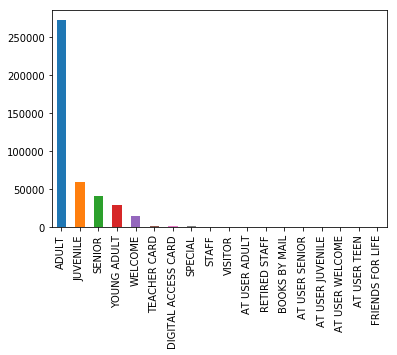

In [73]:
library_new['Patron Type Definition'].value_counts().plot(kind='bar')

## Categorical Outliers
Categories with low counts can be examined further.

In [74]:
library_new['Patron Type Definition'].value_counts()

ADULT                  272251
JUVENILE                59208
SENIOR                  41619
YOUNG ADULT             28816
WELCOME                 14931
TEACHER CARD             1782
DIGITAL ACCESS CARD      1744
SPECIAL                   977
STAFF                     862
VISITOR                   415
AT USER ADULT             349
RETIRED STAFF             157
BOOKS BY MAIL              95
AT USER SENIOR             66
AT USER JUVENILE           47
AT USER WELCOME            45
AT USER TEEN               44
FRIENDS FOR LIFE           40
Name: Patron Type Definition, dtype: int64

## Create an extra column to label these as outliers

In [75]:
library_new['Patron Type Definition'].value_counts().lt(100)[lambda x: x].index

CategoricalIndex(['BOOKS BY MAIL', 'AT USER SENIOR', 'AT USER JUVENILE',
                  'AT USER WELCOME', 'AT USER TEEN', 'FRIENDS FOR LIFE'],
                 categories=['ADULT', 'AT USER ADULT', 'AT USER JUVENILE', 'AT USER SENIOR', 'AT USER TEEN', 'AT USER WELCOME', 'BOOKS BY MAIL', 'DIGITAL ACCESS CARD', ...], ordered=False, dtype='category')

In [77]:
patron_outliers = ['BOOKS BY MAIL', 'AT USER SENIOR', 'AT USER JUVENILE',
                   'AT USER WELCOME', 'AT USER TEEN', 'FRIENDS FOR LIFE']

In [78]:
library_new['Patron Outliers'] = library_new['Patron Type Definition'].isin(patron_outliers)
library_new.head()

,Patron Type Definition,Age Range,Home Library Definition,Circulation Active Date,Total Checkouts,Total Renewals,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District,Patron Outliers
0,SENIOR,65 to 74 years,Main Library,2012-11-01,28,13,email,True,2003,True,NaN,False
1,ADULT,55 to 59 years,Main Library,2015-10-01,21,10,email,True,2003,False,NaN,False
2,ADULT,60 to 64 years,Main Library,2015-01-01,275,559,email,True,2003,True,NaN,False
3,ADULT,45 to 54 years,Mission Bay,2016-02-01,73,38,email,True,2003,False,NaN,False
4,ADULT,45 to 54 years,Main Library,2016-07-01,182,90,email,True,2003,False,NaN,False


# Univariate Analysis with Continuous data
Good idea to start with describe method

In [81]:
summary_cont = library_new.describe().T.loc[:, 'mean':]
summary_cont

,mean,std,min,25%,50%,75%,max
Total Checkouts,161.982097,453.703678,0.0,2.0,19.0,113.0,35907.0
Total Renewals,59.657327,225.009917,0.0,0.0,2.0,27.0,8965.0
Year Patron Registered,2010.348917,4.357374,2003.0,2007.0,2012.0,2014.0,2016.0
Supervisor District,6.288240,3.123634,1.0,4.0,6.0,9.0,11.0


## Possibly add 5 number summary to data dictionary
But, it adds quite a bit messiness

In [82]:
library_dd_new.join(summary_cont)

,Data Type,Definition,Notes,Missing Values Count,Missing Values %,Note,count unique,mean,std,min,25%,50%,75%,max
Column Name,,,,,,,,,,,,,,
Patron Type Definition,category,"Description of patron (adult, teen, child, senior, etc.)",NaN,0,0.000000,Patron Code had 1-1 mapping and was subsequently dropped,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Checkouts,int64,Total number of items the patron has checked out from the library since the record was created.,NaN,0,0.000000,NaN,4274,161.982097,453.703678,0.0,2.0,19.0,113.0,35907.0
Total Renewals,int64,Total number of times the patron has renewed checked-out items.,NaN,0,0.000000,NaN,2738,59.657327,225.009917,0.0,0.0,2.0,27.0,8965.0
Age Range,category,"Age ranges: 0 to 9 years, 10 to 19 years, 20 to 24 years, 25 to 34 years, 35 to 44 years, 45 to 54 years, 55 to 59 years, 60 to 64 years 65 to 74 years, 75 years and over. Some blank.",NaN,215,0.000508,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Home Library Definition,category,Description of the branch library where the patron was originally registered.,NaN,0,0.000000,"Home library code had nearly 1-1 mapping except for Unknown, but was stil dropped",35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Notice Preference Definition,category,Description of the patron’s preferred method of receiving library notices.,NaN,0,0.000000,Patron Code had 1-1 mapping and was subsequently dropped,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Provided Email Address,bool,Indicates whether the patron provided an email address,NaN,0,0.000000,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year Patron Registered,int64,Year patron registered with library system. No dates prior to 2003 due to system migration.,NaN,0,0.000000,NaN,14,2010.348917,4.357374,2003.0,2007.0,2012.0,2014.0,2016.0
Outside of County,bool,"If a patron's home address is not in San Francisco, then flagged as true, otherwise false.",NaN,0,0.000000,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Get a sense of the distribution
Histograms are great for this

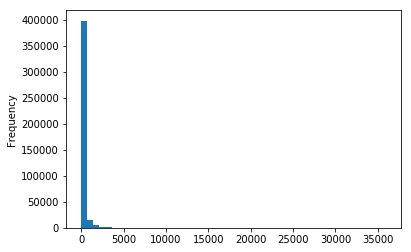

In [83]:
library_new['Total Checkouts'].plot(kind='hist', bins=50)

Looks like there are some extreme outliers here

/Users/Ted/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


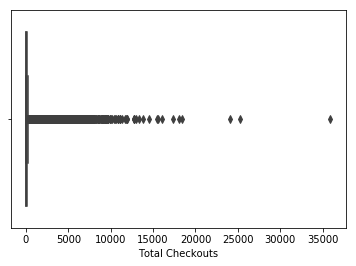

In [84]:
sns.boxplot('Total Checkouts',  data=library_new)

### Choose a cut-off and examine those points later

In [85]:
(library_new['Total Checkouts'] > 5000).mean()

0.0009729648032343994

## Can add these as outliers again

In [86]:
library_new['Outlier Total Checkouts'] = library_new['Total Checkouts'] > 5000

## Filter for outliers:

In [87]:
library_new[library_new['Outlier Total Checkouts']].head()

,Patron Type Definition,Age Range,Home Library Definition,Circulation Active Date,Total Checkouts,Total Renewals,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District,Patron Outliers,Outlier Total Checkouts
319,ADULT,60 to 64 years,Ortega,2016-07-01,5673,208,email,True,2003,False,4.0,False,True
334,ADULT,45 to 54 years,Ortega,2014-07-01,5158,201,email,True,2003,False,9.0,False,True
558,ADULT,60 to 64 years,Main Library,2016-07-01,10521,621,phone,False,2003,False,6.0,False,True
679,ADULT,60 to 64 years,Richmond,2016-07-01,6335,375,phone,False,2003,False,11.0,False,True
758,ADULT,60 to 64 years,Mission,2015-06-01,5040,2063,email,True,2003,False,9.0,False,True


# Continue with checklist
* Multivariate Analysis
* Check for duplicated rows
* Bootstrap to get more samples